In [1]:
import heartpy as hp
from scipy.io import loadmat,savemat
from scipy import signal
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import os
def calucate_hr(ppgsignal):
    Nfft=4096
    srate=125   
    # HRrange=np.arange(round(1*Nfft/srate),round(4*Nfft/srate)+2)
    # psd=1/len(signal)*fft(signal,Nfft)**2
    wd, m = hp.process(ppgsignal, sample_rate = srate)
    # print('bpm:{} tpye:{} isnan:{}'.format(m['bpm'],type(m['bpm']),math.isnan(m['bpm'])))
    return m['bpm']
    # max_peak=np.where(signal==max(signal))
    # bpm=self.Loc2BPM(max_peak[0]+1,srate,Nfft)
    # return bpm
def divide_ppg(signal,length,overlap):
    totalnum=len(signal)/length
    pass

currnent bpm:67.49156355455568
after resample,currnent bpm:141.06583072100315


/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2233: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

"\nNfft=4096\nsrate=250  \nwd, m = hp.process(signal, sample_rate = srate)   \nprint( m['bpm'])\n"

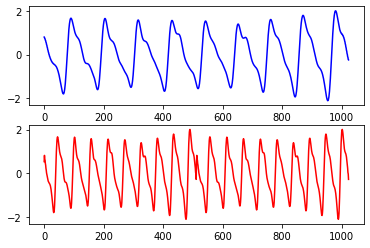

In [2]:
####################################
# resample segment length at 1024
###################################
##############################
#  increase the frquency 
##############################
signalpath='./data/500.mat'
ppgsignal=loadmat(signalpath)
ppgsignal=ppgsignal['ppgseg']
ppgsignal=ppgsignal[0]
ppgsignal=preprocessing.scale(ppgsignal)
ppgsignal=signal.resample(ppgsignal,1024)
bpm=calucate_hr(ppgsignal)
print('currnent bpm:{}'.format(bpm))
###########################################
# resmaple  and plot
##########################################
resamplesignal=signal.resample(ppgsignal,512)
# print(resamplesignal.shape)
newsignal=np.concatenate((resamplesignal,resamplesignal))
# print(newsignal.shape)
plt.subplot(211)
plt.plot(ppgsignal,'b')
plt.subplot(212)
plt.plot(newsignal,'r')
bpm=calucate_hr(newsignal)
print('after resample,currnent bpm:{}'.format(bpm))


'''
Nfft=4096
srate=250  
wd, m = hp.process(signal, sample_rate = srate)   
print( m['bpm'])
'''

currnent bpm:69.12442396313364
after resample,currnent bpm:144.53961456102783


/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

"\nNfft=4096\nsrate=250  \nwd, m = hp.process(signal, sample_rate = srate)   \nprint( m['bpm'])\n"

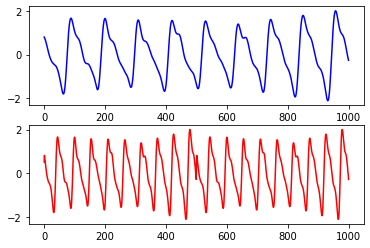

In [3]:
##############################
#  increase the frquency
##############################
signalpath='./data/500.mat'
ppgsignal=loadmat(signalpath)
ppgsignal=ppgsignal['ppgseg']
ppgsignal=ppgsignal[0]
ppgsignal=preprocessing.scale(ppgsignal)
# ppgsignal=signal.resample(ppgsignal,1024)
bpm=calucate_hr(ppgsignal)
print('currnent bpm:{}'.format(bpm))
###########################################
# resmaple  and plot
##########################################
resamplesignal=signal.resample(ppgsignal,500)
# print(resamplesignal.shape)
newsignal=np.concatenate((resamplesignal,resamplesignal))
# print(newsignal.shape)
plt.subplot(211)
plt.plot(ppgsignal,'b')
plt.subplot(212)
plt.plot(newsignal,'r')
bpm=calucate_hr(newsignal)
print('after resample,currnent bpm:{}'.format(bpm))


'''
Nfft=4096
srate=250  
wd, m = hp.process(signal, sample_rate = srate)   
print( m['bpm'])
'''

In [4]:
###############################
# generate resample data in total folder
##############################
datapath='./data'
datas=os.listdir(datapath)
totalfiles=[os.path.join(datapath,data) for data in datas]
######################################
# calculate bpm for every signal pppg
#####################################
for signalpath in totalfiles:
#     print(signalpath)
    slices=signalpath.split('/')
#     print(slices)
    num=slices[2][:-4]
    num=int(num)+768
#     print(num)
    ppgsignal=loadmat(signalpath)
    ppgsignal=ppgsignal['ppgseg']
    ppgsignal=ppgsignal[0]
    ppgsignal=preprocessing.scale(ppgsignal)
    bpm=calucate_hr(ppgsignal)
    resamplesignal=signal.resample(ppgsignal,500)
    print('currnent bpm:{}'.format(bpm))
    newsignal=np.concatenate((resamplesignal,resamplesignal))
#     print(newsignal.shape)
    ppgseg=newsignal
    newbpm=calucate_hr(newsignal)
    savemat('./sampledata/'+str(num) +'.mat',{'ppgseg':ppgseg})
    
    print('after resample currnent bpm:{}'.format(newbpm))
#     break

currnent bpm:78.28810020876827


/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

FileNotFoundError: [Errno 2] No such file or directory: './sampledata/1373.mat'

In [1]:
###############################
# generate scale data in noisydata folder
##############################
datapath='./ppg-hr'
datas=os.listdir(datapath)
totalfiles=[os.path.join(datapath,data) for data in datas]

for signalpath in totalfiles:
#     print(signalpath)
    slices=signalpath.split('/')
#     print(slices)
    num=slices[2][:-4]
#     print(num)
#     break
    ppgsignal=loadmat(signalpath)
    ppgsignal=ppgsignal['ppg']
    ppgsignal=ppgsignal[0]
#     plt.subplot(211)
#     plt.plot(ppgsignal,'b')
    ppgsignal=preprocessing.scale(ppgsignal)
#     plt.subplot(212)
#     plt.plot(ppgsignal,'r')
#     plt.show()
#     bpm=calucate_hr(ppgsignal)
#     resamplesignal=signal.resample(ppgsignal,500)
#     print('currnent bpm:{}'.format(bpm))
#     newsignal=np.concatenate((resamplesignal,resamplesignal))
#     print(newsignal.shape)
#     ppgseg=newsignal
#     newbpm=calucate_hr(newsignal)
    savemat('./noisydata/'+str(num) +'.mat',{'ppgseg':ppgsignal})
    
#     print('after resample currnent bpm:{}'.format(newbpm))
#     break

NameError: name 'os' is not defined

In [26]:
import heartpy as hp
from scipy.io import loadmat,savemat
from scipy import signal
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import os
def calucate_hr(ppgsignal):
    Nfft=4096
    srate=125   
    # HRrange=np.arange(round(1*Nfft/srate),round(4*Nfft/srate)+2)
    # psd=1/len(signal)*fft(signal,Nfft)**2
    wd, m = hp.process(ppgsignal, sample_rate = srate,bpmmax=65535)
    # print('bpm:{} tpye:{} isnan:{}'.format(m['bpm'],type(m['bpm']),math.isnan(m['bpm'])))
    return m['bpm']
    # max_peak=np.where(signal==max(signal))
    # bpm=self.Loc2BPM(max_peak[0]+1,srate,Nfft)
    # return bpm

In [27]:
################################
# define dataset
################################
import torch as t
from torch import nn
from torch.utils import data
import os
import scipy.io as sio
import numpy as np
import ipdb
class PPGData(data.Dataset):
    def __init__(self,root):
        datas=os.listdir(root)
        self.totaldata=[os.path.join(root,data) for data in datas]
    def __getitem__(self,index):
        # freqdata=np.zeros((4,7,1025))
        ppgpath=self.totaldata[index]
        ppgsignal=sio.loadmat(ppgpath)
        #ipdb.set_trace()
        ppgsignal=ppgsignal['ppgseg']
        
        ##################
        # get the label
        #################
        '''
        for i in np.arange(freq.size):
            freqdata[i]=freq[i][0]
         '''
        listslice=ppgpath.split('/')
        if listslice[1]=='noisydata':
            label=listslice[2].split('-')[2][:-4]
        else: 
            label=calucate_hr(ppgsignal[0])
        label=float(label)
        return ppgsignal,label
       
        
        #return ppgsignal
    def __len__(self):
        return len(self.totaldata)

In [28]:
Tmp_DataSet=PPGData('./noisydata/') 
tmp_signal=Tmp_DataSet[0]
print(type(tmp_signal))

<class 'tuple'>


In [29]:

%env CUDA_VISIBLE_DEVICES=1

from torch.utils.data import DataLoader

filepath='./cleansampledata'
filepath2='./noisydata'
filepath3='./valdata'
cleandata=PPGData(filepath)
noisydata=PPGData(filepath2)
valdata=PPGData(filepath3)
batch_size=10
# pdb.set_trace()
device = 'cpu'
if t.cuda.is_available:
# device = t.device('cuda:0' if t.cuda.is_available() else 'cpu')
    device = 'cuda'
CUDA = (device == 'cuda')
print(device,CUDA)
# pdb.set_trace()
Cleandloador=DataLoader(cleandata,batch_size=batch_size,shuffle=True,num_workers=8,pin_memory=CUDA)
NoisyLoador=DataLoader(noisydata,batch_size=batch_size,shuffle=True,num_workers=8,pin_memory=CUDA)
ValLoador=DataLoader(valdata,batch_size=batch_size,num_workers=8,pin_memory=CUDA)
print('clean:',len(cleandata))
print('noisy',len(noisydata))
print('val',len(valdata))
#dataiter=iter(Cleandloador)
# sample=dataiter.next()

env: CUDA_VISIBLE_DEVICES=1
cuda True
clean: 1536
noisy 1768
val 148


In [30]:
##########################
# define conv block
#########################
import ipdb
def weights_init(m):
    classname = m.__class__.__name__
#     ipdb.set_trace()
    #print('classname:{}'.format(classname))
    if classname.find('Conv1dBlock') != -1:
        print('Initializing weights of convresblock to 0.0, 0.02')
        for k, p in m.named_parameters():
            if 'weight' in k and 'conv' in k:
                p.data.normal_(0.0, 0.02)
    elif classname.find('Conv1d') != -1:
        print('Initialzing weight to 0.0, 0.02 for module: ', m)
        m.weight.data.normal_(0.0, 0.02)
        if hasattr(m, 'bias') and m.bias is not None:
            print('bias to 0 for module: ', m)
            m.bias.data.fill_(0)
    elif classname.find('Linear') != -1:
        print('Initializing FC weight to xavier uniform')
        nn.init.xavier_uniform_(m.weight.data)
def weight_reset(m):
    if isinstance(m, nn.Conv1d) or isinstance(m, nn.Linear) or isinstance(m,nn.ConvTranspose1d):
        m.reset_parameters()

def build_norm_layer(norm_type, param=None, num_feats=None):
    if norm_type == 'bnorm':
        return nn.BatchNorm1d(num_feats)
    elif norm_type == 'snorm':
        spectral_norm(param)
        return None
    elif norm_type is None:
        return None
    else:
        raise TypeError('Unrecognized norm type: ', norm_type)

class Conv1dBlock(nn.Module):
    def __init__(self,ninp,fmaps,kwidth,stride):
        super().__init__()
        self.conv=nn.Conv1d(ninp,fmaps,kwidth,stride)
        self.norm = build_norm_layer('bnorm', self.conv, fmaps)
        # self.pool=nn.MaxPool1d(kernel_size=(1,2),stride=(1,2))
        self.act=nn.PReLU()
        
    def forward(self,x):
        x=self.conv(x)
        # x=self.pool(x)
        x=self.norm(x)
        x=self.act(x)
        return x
class DeConv1dBlock(nn.Module):
    def __init__(self,ninp,fmaps,kwidth,stride):
        super().__init__()
        self.conv=nn.ConvTranspose1d(ninp,fmaps,kwidth,stride)
        self.norm = build_norm_layer('bnorm', self.conv, fmaps)
        # self.pool=nn.MaxPool1d(kernel_size=(1,2),stride=(1,2))
        self.act=nn.PReLU()
    def forward(self,x):
        x=self.conv(x)
        # x=self.pool(x)
        x=self.norm(x)
        x=self.act(x)
        return x
##############################
# define network 
##############################
class Generator(nn.Module):
    def __init__(self,fmaps):
        super(Generator,self).__init__()
        self.fmaps=fmaps
        self.ConvBlocks=nn.ModuleList()
        self.DeConvBlocks=nn.ModuleList()
        for i,fmap in enumerate(fmaps):
            if i==0:
                convblock=Conv1dBlock(1,fmap,4,1)
            else:
                convblock=Conv1dBlock(2**(i+4),fmap,4,1)
            self.ConvBlocks.append(convblock)
        fmaps.reverse()
        for j,fmap in enumerate(fmaps):
            if j!=len(fmaps)-1:
                deconvblock=DeConv1dBlock(fmap,fmap//2,4,1)
            else:
                deconvblock=DeConv1dBlock(fmap,1,4,1)
            self.DeConvBlocks.append(deconvblock)
        # self.conv1=nn.Conv1d(1,32,1)
        # self.conv2=nn.Conv1d(32,64,1)
        # self.conv3=nn.Conv1d(64,128,1)
        # self.conv4=nn.Conv1d(128,256,1)
        # self.conv5=nn.Conv1d(256,512,1)
        # self.deconv1=nn.ConvTranspose1d(512,256,1)
        # self.deconv2=nn.ConvTranspose1d(256,128,1)
        # self.deconv3=nn.ConvTranspose1d(128,64,1)
        # self.deconv4=nn.ConvTranspose1d(64,32,1)
        # self.deconv5=nn.ConvTranspose1d(32,1,1)
    def forward(self,x):
        ############################
        # conv 
        ###########################
        # ipdb.set_trace()
        for i in range(len(self.fmaps)):
            convblock=self.ConvBlocks[i]
            x=convblock(x)
        #######################
        # deconv
        #######################
        for j in range(len(self.fmaps)):
            deconvblock=self.DeConvBlocks[j]
            x=deconvblock(x)
        return x
    def get_n_params(self):
        pp=0
        for p in list(self.parameters()):
            nn=1
            for s in list(p.size()):
                nn = nn*s
            pp += nn
        return pp 

In [31]:
class Discriminator(nn.Module):
    def __init__(self,ninputs,fmaps):
        super(Discriminator,self).__init__()
        self.fmaps=fmaps
        self.ConvBlocks=nn.ModuleList()
        for i,fmap in enumerate(fmaps):
            if i==0:
                convblock=Conv1dBlock(ninputs,fmap,4,2)
            else:
                convblock=Conv1dBlock(2**(i+4),fmap,4,2)
            self.ConvBlocks.append(convblock)
         # linear
        self.linear=nn.Sequential(
                nn.Linear(512*29,1024),
                nn.BatchNorm1d(1024),
                nn.ReLU(),
                
                nn.Linear(1024,1),
                nn.Sigmoid())
    def forward(self,x):
        ############################
        # conv 
        ###########################
       
        for i in range(len(self.fmaps)):
            convblock=self.ConvBlocks[i]
            x=convblock(x)   
        #ipdb.set_trace()
        x=x.view(x.size(0),-1)
        out=self.linear(x)
        return out

In [32]:


# stimusig=np.random.rand(100,1,1000)
stimusig=t.rand(100,1,1000)
print('input shape:{}'.format(stimusig.shape))
Gfmaps=[32,64,128,256,512]
NetG=Generator(fmaps=Gfmaps)
print('Total NetG parameters: ',NetG.get_n_params())
GenSig=NetG(stimusig)
print('output shape:{}'.format(GenSig.shape))
Dfmaps=[32,64,128,256,512]
NetD=Discriminator(1,Dfmaps)
score=NetD(GenSig)
print("score shape:{}".format(score.shape))
NetD.to(device)
NetG.to(device)
NetG.apply(weights_init)
NetD.apply(weights_init)
print(NetG)
print(NetD)

input shape:torch.Size([100, 1, 1000])
Total NetG parameters:  1397325
output shape:torch.Size([100, 1, 1000])
score shape:torch.Size([100, 1])
Initialzing weight to 0.0, 0.02 for module:  Conv1d(1, 32, kernel_size=(4,), stride=(1,))
bias to 0 for module:  Conv1d(1, 32, kernel_size=(4,), stride=(1,))
Initializing weights of convresblock to 0.0, 0.02
Initialzing weight to 0.0, 0.02 for module:  Conv1d(32, 64, kernel_size=(4,), stride=(1,))
bias to 0 for module:  Conv1d(32, 64, kernel_size=(4,), stride=(1,))
Initializing weights of convresblock to 0.0, 0.02
Initialzing weight to 0.0, 0.02 for module:  Conv1d(64, 128, kernel_size=(4,), stride=(1,))
bias to 0 for module:  Conv1d(64, 128, kernel_size=(4,), stride=(1,))
Initializing weights of convresblock to 0.0, 0.02
Initialzing weight to 0.0, 0.02 for module:  Conv1d(128, 256, kernel_size=(4,), stride=(1,))
bias to 0 for module:  Conv1d(128, 256, kernel_size=(4,), stride=(1,))
Initializing weights of convresblock to 0.0, 0.02
Initialzing 

In [33]:
###########################
# mkdir to save the model
###########################
import os 
from datetime import datetime
def mksavedir():
    date=datetime.date(datetime.now())
    cwd=os.getcwd()
    slices=cwd.split('/')
    currentdir=slices[-1]
    if currentdir!='model':
        os.chdir('model')
    if not os.path.exists(str(date)):
        os.mkdir(str(date))
    os.chdir('../')

In [39]:
#####################################
#  define optimizer and loss function
#####################################
import torch.optim as optim
optimizer_g=optim.Adam(NetG.parameters(),lr=0.001)
optimizer_d=optim.Adam(NetD.parameters(),lr=0.001)
# criterion=nn.BCELoss().to(device)
criterion=nn.L1Loss().to(device)  #SooothL1Loss 
###################################
# define label and epoch
###################################
true_labels=t.ones((batch_size,1)).to(device)
fake_labels=t.zeros((batch_size,1)).to(device)
epochs = range(100)

In [40]:
def evaluationhr(ppg_signals,ppg_labels):
    ipdb.set_trace()
    for i in ppg_signals.shape[0]:
        pass

In [41]:
##############################
# train 
##############################
import warnings
warnings.filterwarnings("ignore")
from visdom import Visdom
iteration=0
numepoch=0
NetD=NetD.double()
NetG=NetG.double()
#NetD.apply(weight_reset)
#NetG.apply(weight_reset)
ori=sio.loadmat('./noisydata/1-1-74.3392.mat')
FixLabel=151.5957
FixData=ori['ppgseg']
Fixppg=FixData[0]
vis=Visdom()

####################
# original signal
###################
figx=np.linspace(0,Fixppg.shape[0],Fixppg.shape[0])
vis.line(Fixppg,figx,win='ppg',name='1')

for epoch in iter(epochs):
    numepoch+=1
    error_d_real=0.0
    error_d_fake=0.0
    error_g=0.0
    for i,data in enumerate(zip(NoisyLoador,Cleandloador)):
        iteration+=1
        #ipdb.set_trace()
        noisydata=data[0][0].to(device)
        cleandata=data[1][0].to(device)
       
        currentsize=cleandata.size(0)
        cleandata=cleandata[0:currentsize,:,:]
        noisydata=noisydata[0:currentsize,:,:]
        #ori_label=data[0][1][0:currentsize]
        #new_label=data[1][1][0:currentsize]
#         print('current size:{}'.format(currentsize))
        #############################
        # discriminator
        #############################
        if i%3==0: #discriminator update 5 times;gererator update 1 time 
            optimizer_d.zero_grad()
            # sample=sample.double()
            ################
            # 干净信号判别为1
            ################
            #outputs=NetD(cleandata.double())
            outputs=NetD(cleandata)

            loss_d_real=criterion(outputs,true_labels[0:currentsize,:].double())
            loss_d_real.backward()
            ############
            # 生成信号判别为0
            ############
            fake_signal=NetG(noisydata.double()).detach()
            outputs=NetD(fake_signal)
            loss_d_fake=criterion(outputs,fake_labels[0:currentsize,:].double())
            loss_d_fake.backward()
            #############
            # total discriminator loss
            ############ 
            loss_d=loss_d_fake+loss_d_real
            optimizer_d.step()
        
        
        #############################
        # generator
        ############################
     
        optimizer_g.zero_grad()
        fake_signal=NetG(noisydata.double())
        # fake_signal=NetG(noisydata)
        outputs=NetD(fake_signal)
        loss_g=criterion(outputs,true_labels[0:currentsize,:].double())
        loss_g.backward()
        optimizer_g.step()
        
        error_d_fake+=loss_d_fake.item()
        error_d_real+=loss_d_real.item()
        error_g+=loss_g.item()
        ################
        # evaluate hr
        ################
        #ipdb.set_trace()
        difference=[]
        for j,val_data in enumerate(ValLoador,0):
            val_signal=val_data[0].to(device)
            val_labels=val_data[1]
            gen_signal=NetG(val_signal).detach()
            cpu_signals=gen_signal.cpu().numpy()
            cpu_labels=val_labels.cpu().numpy()
          
            for k in range(cpu_signals.shape[0]):
                cur_hr=calucate_hr(cpu_signals[k][0])
                cur_label=cpu_labels[k]
                differ=abs(cur_hr-cur_label)
                difference.append(differ)
        print('[%d,%5d] mae %f' %(epoch+1,i+1,np.mean(difference)))
        if(np.mean(difference)<5):
            break
        #ipdb.set_trace()
        #################
        # visualize 
        #################
        noisysignal=np.reshape(Fixppg,(1,1,1000))
        noisydata=t.from_numpy(noisysignal).to(device)
        genesignal=NetG(noisydata).detach()
        genesignal=genesignal.cpu().numpy()
        vis.line(Fixppg,figx,update='replace',win='ppg',name='1')
        vis.line(genesignal[0][0],figx,update='replace',win='ppg',name='2')
        if i%10==9:
            print('[%d,%5d] loss_d_real %f loss_d_fake %f loss_g %f' %(epoch+1,i+1,error_d_real/10,error_d_fake/10,error_g/10))
            error_d_fake=0.0
            error_d_real=0.0
            error_g=0.0
print('finish training')
mksavedir()
date=datetime.date(datetime.now())
time=datetime.time(datetime.now())
t.save(NetG.state_dict(),'./model/'+str(date)+'/NetG-epoch-{}-iteration{}-{}.pth'.format(numepoch,iteration,time))
t.save(NetD.state_dict(),'./model/'+str(date)+'/NetD-epoch-{}-iteration{}-{}.pth'.format(numepoch,iteration,time))

Setting up a new session...


[1,    1] mae 47.698764
[1,    2] mae 44.868839
[1,    3] mae 40.901128
[1,    4] mae 32.564489
[1,    5] mae 34.172408
[1,    6] mae 38.085441
[1,    7] mae 35.467234
[1,    8] mae 36.036390
[1,    9] mae 38.324486
[1,   10] mae 44.109504
[1,   10] loss_d_real 0.231955 loss_d_fake 0.001258 loss_g 0.997551
[1,   11] mae 58.546223
[1,   12] mae 84.289704
[1,   13] mae 93.345671
[1,   14] mae 112.260551
[1,   15] mae 142.908948
[1,   16] mae 146.915860
[1,   17] mae 126.508079
[1,   18] mae 118.601353
[1,   19] mae 108.553106
[1,   20] mae 120.970104
[1,   20] loss_d_real 0.172434 loss_d_fake 0.002126 loss_g 0.998681
[1,   21] mae 81.012972
[1,   22] mae 113.913989
[1,   23] mae 121.830188
[1,   24] mae 120.335662
[1,   25] mae 93.583391
[1,   26] mae 60.565579
[1,   27] mae 38.140165
[1,   28] mae 30.698294
[1,   29] mae 27.775114
[1,   30] mae 26.429303
[1,   30] loss_d_real 0.321056 loss_d_fake 0.021777 loss_g 0.984240
[1,   31] mae 24.368006
[1,   32] mae 26.026425
[1,   33] mae 25.7

[2,  131] mae 55.165823
[2,  132] mae 54.327676
[2,  133] mae 53.584546
[2,  134] mae 56.554354
[2,  135] mae 55.760317
[2,  136] mae 60.927529
[2,  137] mae 60.413333
[2,  138] mae 52.006264
[2,  139] mae 45.283865
[2,  140] mae 40.919257
[2,  140] loss_d_real 0.202269 loss_d_fake 0.040383 loss_g 0.991608
[2,  141] mae 36.794388
[2,  142] mae 34.152071
[2,  143] mae 32.828762
[2,  144] mae 31.640519
[2,  145] mae 32.203148
[2,  146] mae 30.228078
[2,  147] mae 30.445112
[2,  148] mae 31.932188
[2,  149] mae 30.134748
[2,  150] mae 31.363496
[2,  150] loss_d_real 0.480197 loss_d_fake 0.007587 loss_g 0.997982
[2,  151] mae 30.979058
[2,  152] mae 30.892308
[2,  153] mae 32.041710
[2,  154] mae 30.448519
[3,    1] mae 31.404685
[3,    2] mae 30.230044
[3,    3] mae 30.464510
[3,    4] mae 30.094273
[3,    5] mae 29.997745
[3,    6] mae 30.697826
[3,    7] mae 30.312822
[3,    8] mae 29.721063
[3,    9] mae 30.139560
[3,   10] mae 30.195860
[3,   10] loss_d_real 0.243976 loss_d_fake 0.003

[4,   91] mae 45.762281
[4,   92] mae 47.278337
[4,   93] mae 48.555259
[4,   94] mae 49.050354
[4,   95] mae 56.569510
[4,   96] mae 69.538411
[4,   97] mae 82.142789
[4,   98] mae 92.993436
[4,   99] mae 100.235635
[4,  100] mae 106.921257
[4,  100] loss_d_real 0.200886 loss_d_fake 0.000174 loss_g 0.989016
[4,  101] mae 113.450087
[4,  102] mae 127.490258
[4,  103] mae 82.900534
[4,  104] mae 47.626082
[4,  105] mae 36.000821
[4,  106] mae 31.681650
[4,  107] mae 30.326490
[4,  108] mae 29.506139
[4,  109] mae 29.568589
[4,  110] mae 28.588431
[4,  110] loss_d_real 0.320219 loss_d_fake 0.000936 loss_g 0.997764
[4,  111] mae 28.688487
[4,  112] mae 27.793246
[4,  113] mae 25.648247
[4,  114] mae 24.692693
[4,  115] mae 23.080958
[4,  116] mae 22.725290
[4,  117] mae 23.226499
[4,  118] mae 23.089698
[4,  119] mae 23.636274
[4,  120] mae 23.871864
[4,  120] loss_d_real 0.111786 loss_d_fake 0.002635 loss_g 0.998457
[4,  121] mae 25.701176
[4,  122] mae 27.858700
[4,  123] mae 28.282440


[6,   51] mae 110.405094
[6,   52] mae 110.065695
[6,   53] mae 112.264376
[6,   54] mae 113.072927
[6,   55] mae 115.222202
[6,   56] mae 115.321704
[6,   57] mae 117.004123
[6,   58] mae 117.121419
[6,   59] mae 115.287695
[6,   60] mae 116.600501
[6,   60] loss_d_real 0.171551 loss_d_fake 0.000036 loss_g 0.990533
[6,   61] mae 114.767734
[6,   62] mae 115.679106
[6,   63] mae 112.899421
[6,   64] mae 114.979854
[6,   65] mae 111.743482
[6,   66] mae 109.741057
[6,   67] mae 108.402313
[6,   68] mae 105.063544
[6,   69] mae 102.209731
[6,   70] mae 99.810983
[6,   70] loss_d_real 0.370384 loss_d_fake 0.028388 loss_g 0.999933
[6,   71] mae 99.465337
[6,   72] mae 99.252485
[6,   73] mae 96.610691
[6,   74] mae 96.694822
[6,   75] mae 95.003500
[6,   76] mae 97.062833
[6,   77] mae 96.653690
[6,   78] mae 97.157364
[6,   79] mae 96.959952
[6,   80] mae 95.863060
[6,   80] loss_d_real 0.181574 loss_d_fake 0.000007 loss_g 0.997514
[6,   81] mae 93.648536
[6,   82] mae 94.339969
[6,   83]

[8,   11] mae 82.061817
[8,   12] mae 81.890271
[8,   13] mae 81.761407
[8,   14] mae 81.767529
[8,   15] mae 81.950480
[8,   16] mae 82.059458
[8,   17] mae 82.022372
[8,   18] mae 81.907825
[8,   19] mae 81.909757
[8,   20] mae 82.194368
[8,   20] loss_d_real 0.250236 loss_d_fake 0.021327 loss_g 0.999874
[8,   21] mae 82.223771
[8,   22] mae 82.208222
[8,   23] mae 82.116975
[8,   24] mae 82.374637
[8,   25] mae 82.466797
[8,   26] mae 82.555080
[8,   27] mae 82.800176
[8,   28] mae 83.137253
[8,   29] mae 83.067617
[8,   30] mae 82.853724
[8,   30] loss_d_real 0.201414 loss_d_fake 0.000084 loss_g 0.999953
[8,   31] mae 82.846557
[8,   32] mae 82.144372
[8,   33] mae 81.686413
[8,   34] mae 81.241243
[8,   35] mae 81.439122
[8,   36] mae 80.499016
[8,   37] mae 81.120666
[8,   38] mae 80.592782
[8,   39] mae 80.370583
[8,   40] mae 80.171319
[8,   40] loss_d_real 0.220813 loss_d_fake 0.000023 loss_g 0.999756
[8,   41] mae 81.006695
[8,   42] mae 80.068519
[8,   43] mae 80.253014
[8, 

[9,  125] mae 59.845760
[9,  126] mae 58.396844
[9,  127] mae 58.842547
[9,  128] mae 57.865814
[9,  129] mae 57.236931
[9,  130] mae 56.590903
[9,  130] loss_d_real 0.255523 loss_d_fake 0.000004 loss_g 0.999892
[9,  131] mae 55.961992
[9,  132] mae 55.486633
[9,  133] mae 56.402258
[9,  134] mae 56.835644
[9,  135] mae 56.860582
[9,  136] mae 56.339602
[9,  137] mae 55.167238
[9,  138] mae 55.259238
[9,  139] mae 56.990798
[9,  140] mae 57.677562
[9,  140] loss_d_real 0.468148 loss_d_fake 0.000003 loss_g 0.989573
[9,  141] mae 59.309330
[9,  142] mae 60.943647
[9,  143] mae 60.929126
[9,  144] mae 61.833234
[9,  145] mae 62.379823
[9,  146] mae 63.466110
[9,  147] mae 65.579929
[9,  148] mae 64.016747
[9,  149] mae 65.648647
[9,  150] mae 64.302300
[9,  150] loss_d_real 0.236185 loss_d_fake 0.023700 loss_g 0.999201
[9,  151] mae 62.561068
[9,  152] mae 64.741831
[9,  153] mae 68.783361
[9,  154] mae 70.145586
[10,    1] mae 70.372685
[10,    2] mae 70.713788
[10,    3] mae 73.719739
[

[11,   73] mae 103.879364
[11,   74] mae 104.080406
[11,   75] mae 102.622807
[11,   76] mae 101.860805
[11,   77] mae 106.117084
[11,   78] mae 109.784763
[11,   79] mae 113.699683
[11,   80] mae 115.454697
[11,   80] loss_d_real 0.190248 loss_d_fake 0.002086 loss_g 0.981551
[11,   81] mae 114.935574
[11,   82] mae 104.991013
[11,   83] mae 104.367714
[11,   84] mae 101.088390
[11,   85] mae 103.705375
[11,   86] mae 100.903998
[11,   87] mae 104.780536
[11,   88] mae 102.833873
[11,   89] mae 99.262749
[11,   90] mae 96.288174
[11,   90] loss_d_real 0.262082 loss_d_fake 0.053145 loss_g 0.985319
[11,   91] mae nan
[11,   92] mae 86.318202
[11,   93] mae 81.406537
[11,   94] mae 80.065229
[11,   95] mae 78.650643
[11,   96] mae 75.410053
[11,   97] mae 74.667112
[11,   98] mae 75.459219
[11,   99] mae 74.456323
[11,  100] mae 69.422125
[11,  100] loss_d_real 0.170479 loss_d_fake 0.000002 loss_g 0.991960
[11,  101] mae 71.267787
[11,  102] mae 68.955646
[11,  103] mae 71.193887
[11,  10

[13,   24] mae 20.662753
[13,   25] mae 20.473909
[13,   26] mae 20.992728
[13,   27] mae 21.103566
[13,   28] mae 21.172836
[13,   29] mae 20.798757
[13,   30] mae 21.670301
[13,   30] loss_d_real 0.346515 loss_d_fake 0.010065 loss_g 0.999305
[13,   31] mae 21.302927
[13,   32] mae 21.458843
[13,   33] mae 21.646350
[13,   34] mae 23.017569
[13,   35] mae 22.661566
[13,   36] mae 22.800116
[13,   37] mae 20.957242
[13,   38] mae 22.500229
[13,   39] mae 22.431311
[13,   40] mae 21.468634
[13,   40] loss_d_real 0.121153 loss_d_fake 0.049854 loss_g 0.978063
[13,   41] mae 21.313730
[13,   42] mae 22.014293
[13,   43] mae 21.772534
[13,   44] mae 21.020619
[13,   45] mae 21.068329
[13,   46] mae 20.729058
[13,   47] mae 21.072655
[13,   48] mae 21.452418
[13,   49] mae 22.625503
[13,   50] mae 23.000031
[13,   50] loss_d_real 0.230902 loss_d_fake 0.114820 loss_g 0.962672
[13,   51] mae 21.107774
[13,   52] mae 21.793397
[13,   53] mae 22.169565
[13,   54] mae 23.819325
[13,   55] mae 25.

[14,  138] mae 109.506696
[14,  139] mae 105.069018
[14,  140] mae 99.240845
[14,  140] loss_d_real 0.565209 loss_d_fake 0.002727 loss_g 0.993014
[14,  141] mae 96.058970
[14,  142] mae 95.702180
[14,  143] mae 91.266571
[14,  144] mae 84.413126
[14,  145] mae 79.322307
[14,  146] mae 74.162869
[14,  147] mae 72.795380
[14,  148] mae 70.669071
[14,  149] mae 67.872222
[14,  150] mae 68.711947
[14,  150] loss_d_real 0.214656 loss_d_fake 0.000828 loss_g 0.954947
[14,  151] mae 67.491903
[14,  152] mae 70.073157
[14,  153] mae 71.682976
[14,  154] mae 71.846370
[15,    1] mae 72.398095
[15,    2] mae 77.612443
[15,    3] mae 86.490371
[15,    4] mae 97.885959
[15,    5] mae 101.113267
[15,    6] mae 101.639989
[15,    7] mae nan
[15,    8] mae nan
[15,    9] mae nan
[15,   10] mae nan
[15,   10] loss_d_real 0.151014 loss_d_fake 0.014678 loss_g 0.950123
[15,   11] mae nan
[15,   12] mae nan
[15,   13] mae 139.424885
[15,   14] mae 128.252172
[15,   15] mae 124.417831
[15,   16] mae 114.994

BadSignalWarning: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


after denoise bpm:340.90909090909093,differ:178.04269090909094
total diff:178.04269090909094


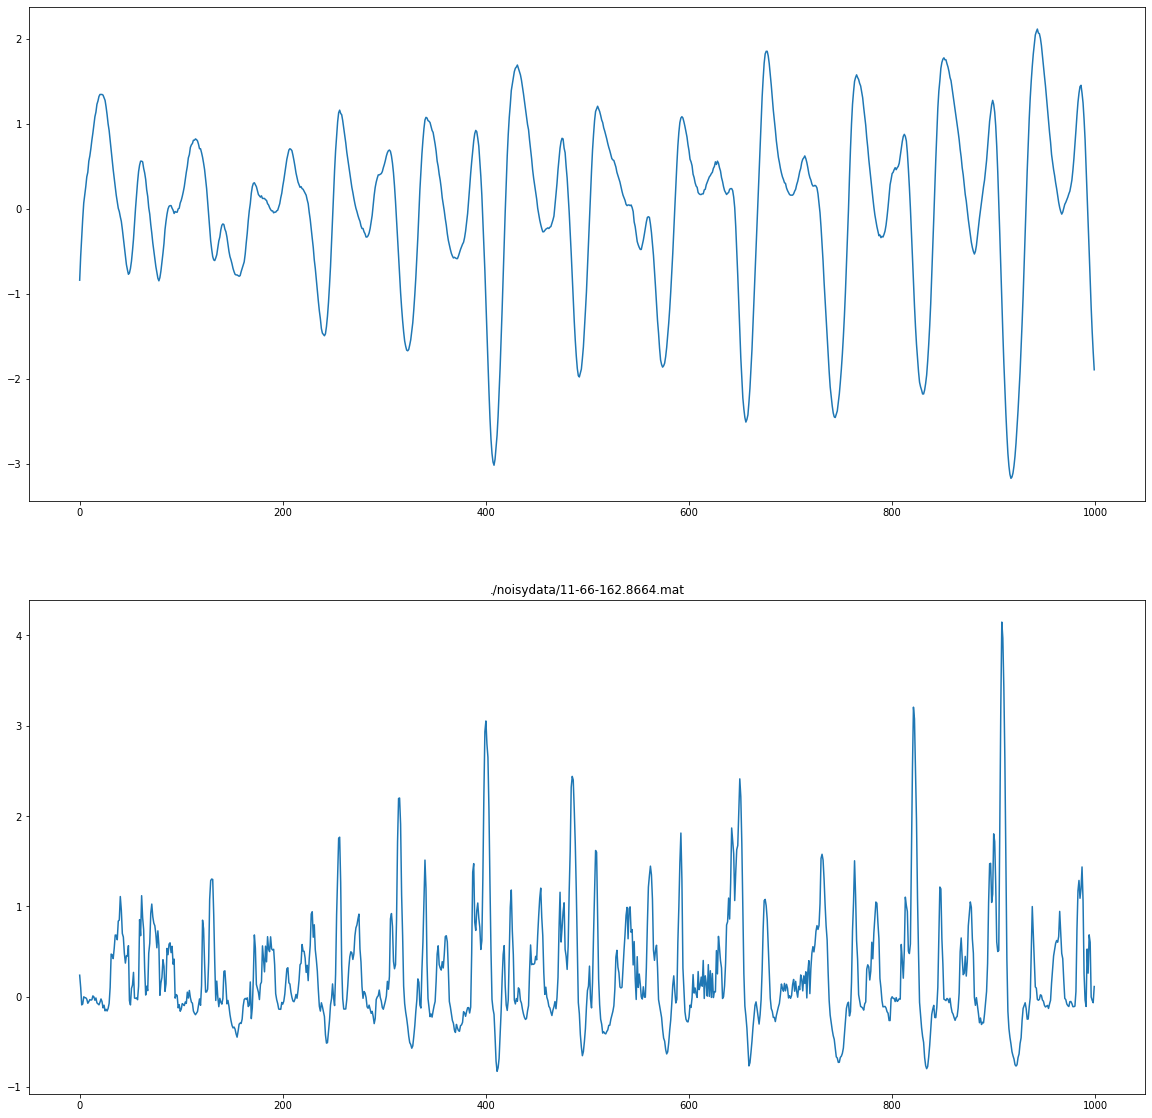

In [64]:
####################
# evaluation
###################
import matplotlib.pyplot as plt
import glob
import os
plt.rcParams["figure.figsize"] = (20,20)
difference=[]
files_dir=glob.glob(os.path.join('./noisydata/','*.mat'))
for file in files_dir:
    ppgsignal=sio.loadmat(file)
    spilt_slices=file.split('/')
    file_name=spilt_slices[-1]
    #print(file_name)
    label=file_name.split('-')[-1][:-4]
    #print(label)
    #ppgsignal=sio.loadmat('./noisydata/1-25-94.7368.mat')
    ppgsignal=ppgsignal['ppgseg']
    ppgsignal=ppgsignal[0]
    plt.subplot(211)
    plt.plot(ppgsignal)
    #print('before denoise bpm:{},label:{}'.format(calucate_hr(ppgsignal),label))
    noisysignal=np.reshape(ppgsignal,(1,1,1000))
    #print(noisysignal.shape)
    noisydata=t.from_numpy(noisysignal).to(device)
    # noisydata.to(device)
    genesignal=NetG(noisydata).detach()
    genesignal=genesignal.cpu().numpy()
    plt.subplot(212)
    plt.plot(genesignal[0][0])
    plt.title(file)
    denoise_hr=calucate_hr(genesignal[0][0])
    differ=float(label)-denoise_hr
    if differ<0:
        differ=-differ
    difference.append(differ)
    print('after denoise bpm:{},differ:{}'.format(denoise_hr,differ))
    break
print('total diff:{}'.format(np.mean(difference)))